In [37]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prep
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#bringing in our zillow data
df = acquire.get_zillow_data()

In [3]:
#checking to make sure it worked
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df = prep.handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75)

In [5]:
df

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential
4,266.0,2.0,10887214,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77570,266.0,2.0,10833991,2864704,3.0,3.0,8.0,3.0,1741.0,1741.0,...,265000.0,379000.0,2016.0,114000.0,4685.34,6.037132e+13,-0.002245,2017-09-20,Central,Condominium
77571,261.0,2.0,11000655,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Central,Single Family Residential
77572,261.0,NaN,17239384,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,NaN,Single Family Residential
77573,261.0,2.0,12773139,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Single Family Residential


In [6]:
#using only single units/or at least trying to
df = df[(df.propertylandusedesc == 'Single Family Residential') |
          (df.propertylandusedesc == 'Mobile Home') |
          (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') |
          (df.propertylandusedesc == 'Townhouse')]

In [16]:
#df.isna().sum()

In [8]:
df = prep.remove_outliers(df, 1.5,['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])

In [9]:
df = df.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])

In [10]:
df = prep.impute(df, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])

In [12]:
df.isnull().sum()[df.isnull().sum()>0]

calculatedbathnbr       14
fullbathcnt             14
regionidcity           899
regionidzip             15
yearbuilt               21
censustractandblock     79
dtype: int64

In [14]:
df = prep.impute(df, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock'])

In [15]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [18]:
def train_validate_test_split(df, target, seed=1349):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [20]:
train, validate, test = train_validate_test_split(df, 'logerror', seed=1349)

In [21]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array(df.dtypes == "object")

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

def get_numeric_X_cols(X_train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in X_train.columns.values if col not in object_cols]
    
    return numeric_cols

In [26]:
obj_cols = get_object_cols(train)
obj_cols

['propertycountylandusecode', 'transactiondate', 'propertylandusedesc']

In [25]:
num_cols = get_numeric_X_cols(train, obj_cols)

<br>
<br>

## Exploring

Now that our data is acquired and prepped... let's take a look at it shall we?

My Questions: 
 - Is logerror significantly different between counties? done
 - Does log error differ depending on square footage? done
 - Does log error differ depending on number of bathrooms? done
 - If we control for number of bathrooms, does log error differ depending on square footage?
 - If we control for property county location, does log error differ depending on square footage?

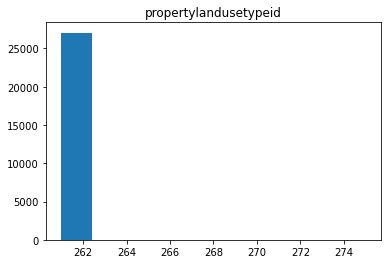

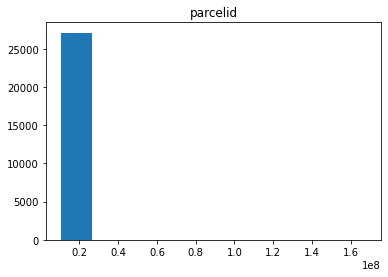

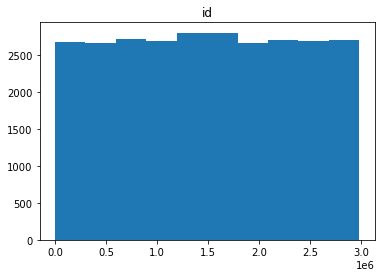

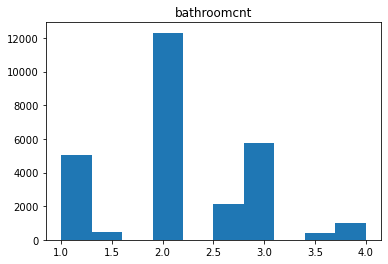

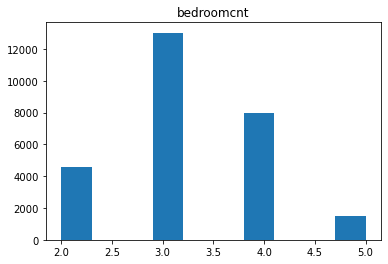

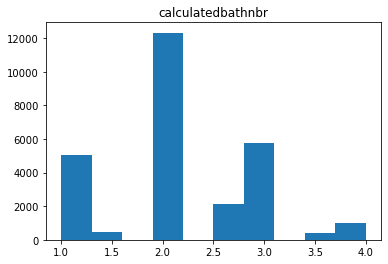

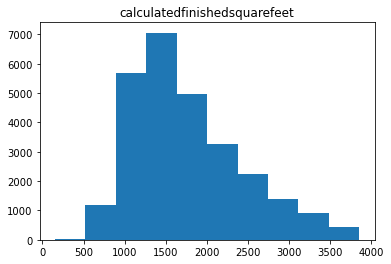

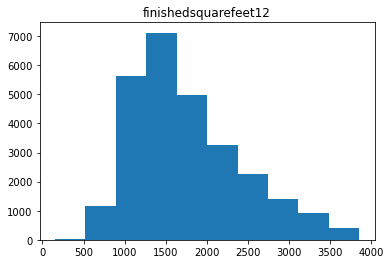

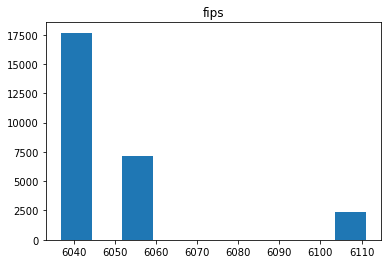

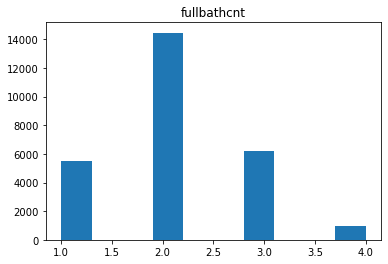

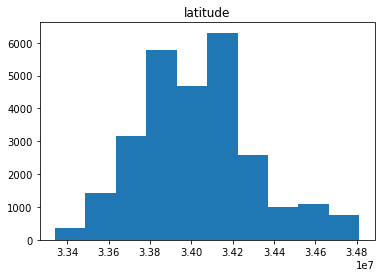

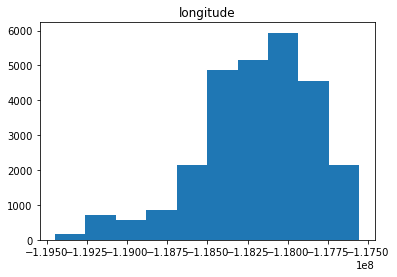

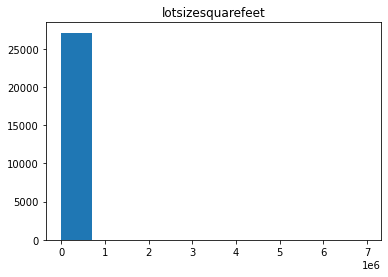

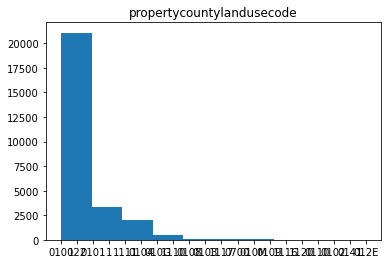

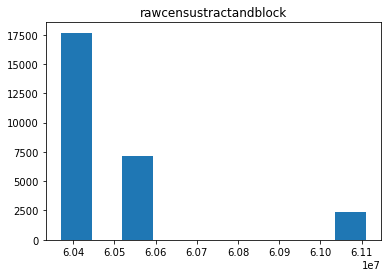

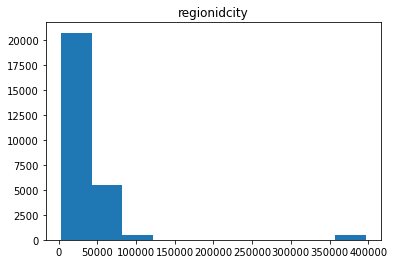

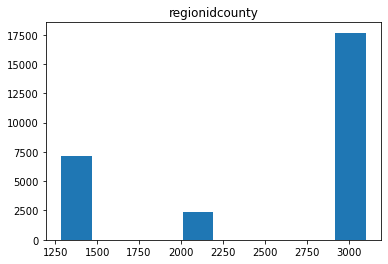

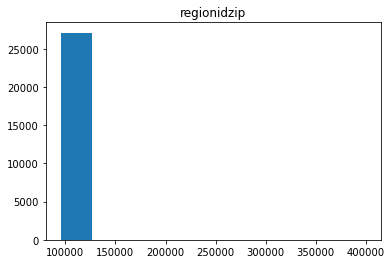

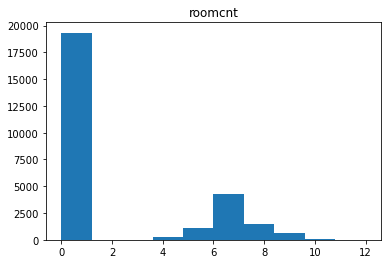

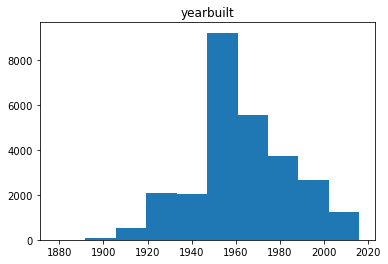

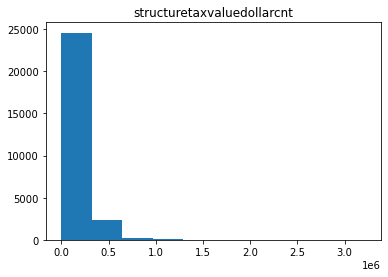

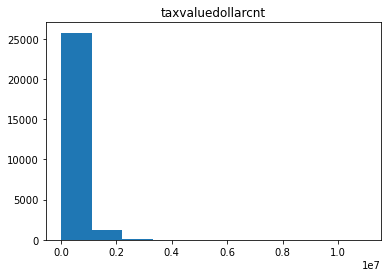

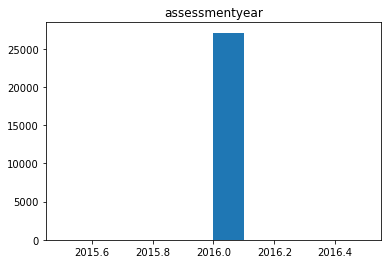

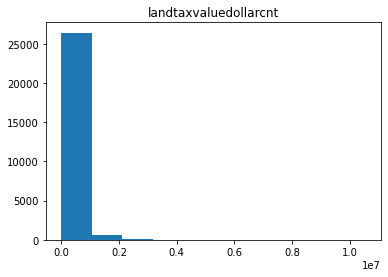

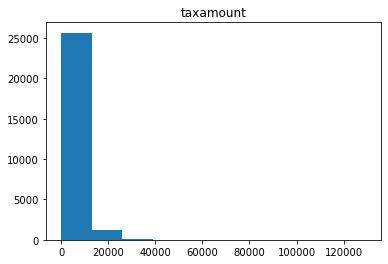

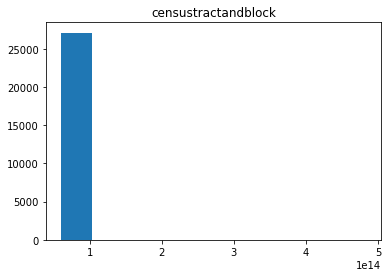

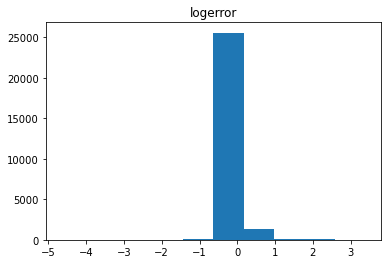

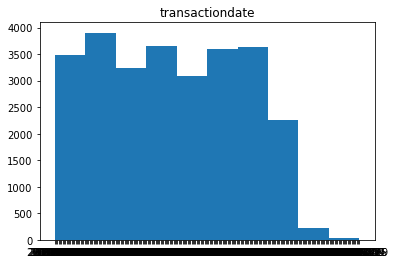

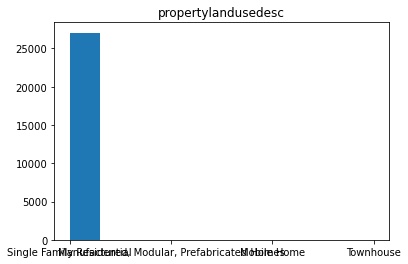

In [29]:
#let's do some univariate exploration
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

Bivariate: Does log error vary across number of bathrooms a house has?

 - Null: Log error does not vary based on number of bathrooms
 - Alt: Log error mean varies based on number of bathrooms

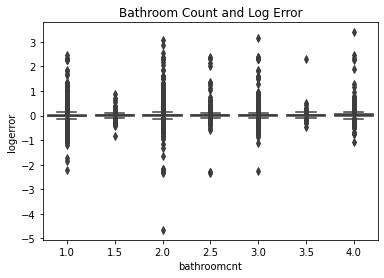

In [33]:
sns.boxplot(train.bathroomcnt, train.logerror)
plt.title('Bathroom Count and Log Error')
plt.show()

In [38]:
stats.levene(train[train.bathroomcnt<=2.5].logerror, train[train.bathroomcnt>2.5].logerror)

LeveneResult(statistic=12.303023881683949, pvalue=0.000452956463432229)

In [39]:
stats.ttest_ind(train[train.bathroomcnt<=2.5].logerror, train[train.bathroomcnt>2.5].logerror)

Ttest_indResult(statistic=-2.1064601243202765, pvalue=0.035173565097128476)

<br>

Bivariate - FIPS and Log Error
 - Null: Log Error does not vary based on county 
 - Alt: Log error mean varies based on county

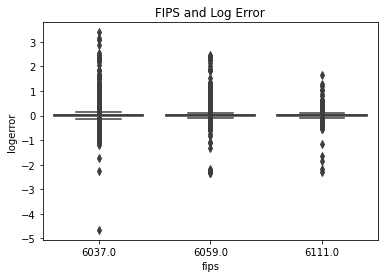

In [40]:
sns.boxplot(train.fips, train.logerror)
plt.title('FIPS and Log Error')
plt.show()

In [48]:
stats.levene(train[train.fips==6037].logerror, train[train.fips!=6037].logerror)

LeveneResult(statistic=45.24356238527618, pvalue=1.774483296378452e-11)

In [50]:
stats.ttest_ind(train[train.fips==6037].logerror, train[train.fips!=6037].logerror, equal_var = True)

Ttest_indResult(statistic=-1.4077792425821423, pvalue=0.15920790968285536)

In [51]:
#Fail to reject the null, the log errors are about the same no matter the county

Sqft and LogError


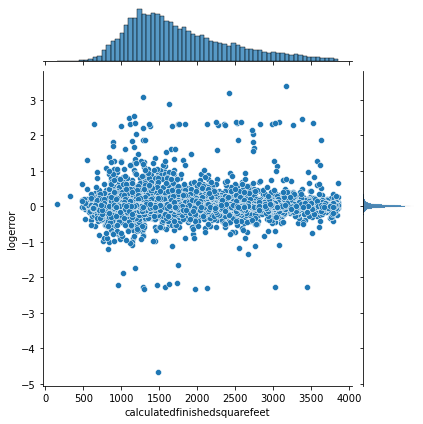

In [43]:
print('Sqft and LogError')
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train)
plt.xlabel('Sqft')
plt.ylabel('Log Error')
plt.show()

In [56]:
stats.levene(train[train.calculatedfinishedsquarefeet<=2000].logerror, train[train.calculatedfinishedsquarefeet>2000].logerror)

LeveneResult(statistic=5.751267379950504, pvalue=0.016483479592617114)

In [57]:
stats.ttest_ind(train[train.calculatedfinishedsquarefeet<=2000].logerror, train[train.calculatedfinishedsquarefeet>2000].logerror)

Ttest_indResult(statistic=-2.801074052698946, pvalue=0.0050968884654338615)

In [53]:
#let's bin the square feet 
train['sqft_bin'] = pd.cut(train.calculatedfinishedsquarefeet, [0,2000,4500])

Multivariate - If we control for sqft, does log error differ depending on number of bathrooms?

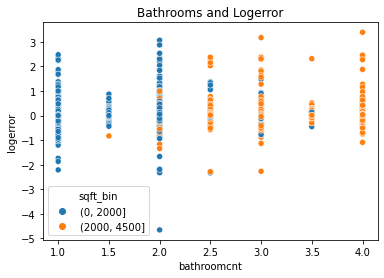

In [61]:
sns.scatterplot(x='bathroomcnt',y='logerror',data=train,hue='sqft_bin')
plt.title('Bathrooms and Logerror')
plt.show()

In [60]:
#seems that log error doesn't vary much, has the most variance with 2 bathrooms

Multivariate - If we control for property county location, does log error differ depending on square footage?

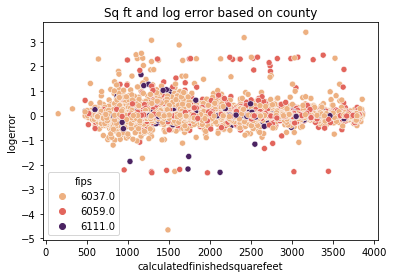

In [73]:
sns.scatterplot(x='calculatedfinishedsquarefeet',y='logerror',data=train,hue='fips', palette='flare')
plt.title('Sq ft and log error based on county')
plt.show()

In [74]:
#apparently not, there's not really any correlation seen.

Multivariate - If we control for number of bathrooms, does log error differ depending on square footage?

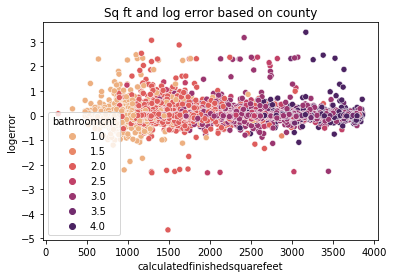

In [75]:
sns.scatterplot(x='calculatedfinishedsquarefeet',y='logerror',data=train,hue='bathroomcnt', palette='flare')
plt.title('Sq ft and log error based on county')
plt.show()

In [76]:
#apparently not, there's not really any correlation seen.